In [265]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.linear_model import LogisticRegression

In [266]:
df = pd.read_csv(r"C:\Users\aliay\OneDrive\Desktop\Github-zone\Machine_Learning\data\Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [268]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [269]:
#   we will drop id column because it is not important
df.drop("User ID",axis=1,inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [270]:
# we will encode Gender Column 
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


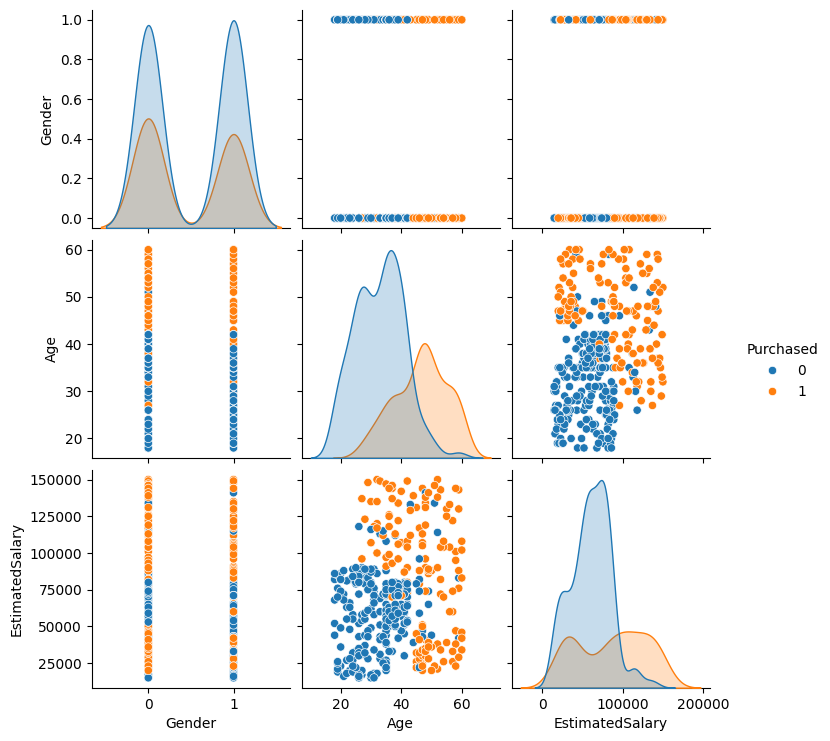

In [271]:
sns.pairplot(df,hue='Purchased')

In [272]:
# Now we separated the Target value 
x = df.drop("Purchased",axis=1)
y = df['Purchased']

In [273]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [274]:
scl = MinMaxScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)           # we transform only on test data

In [275]:
clf = LogisticRegression()

In [276]:
clf.fit(x_train,y_train)

LogisticRegression()

In [277]:
predictions_test = clf.predict(x_test)
predictions_train = clf.predict(x_train)

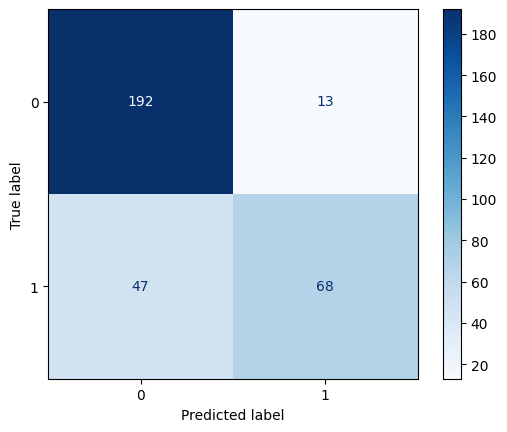

In [278]:
# confusion matrix on training data
cm = confusion_matrix(y_train, predictions_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  

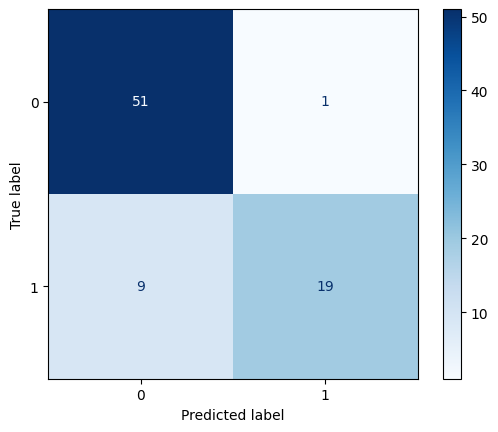

In [279]:
# confusion matrix on testing data
cm = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  

In [280]:
print(accuracy_score(y_train,predictions_train))
print(precision_score(y_train,predictions_train))
print(recall_score(y_train,predictions_train))

0.8125
0.8395061728395061
0.591304347826087


In [281]:
print(accuracy_score(y_test,predictions_test))
print(precision_score(y_test,predictions_test))
print(recall_score(y_test,predictions_test))

0.875
0.95
0.6785714285714286
